In [1]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls")

source("script/packages.R"  )
source("script/input_data.R")
source("script/functions.R" )
source("script/colors.R"    )

suppressPackageStartupMessages(library(coloc))

In [2]:
geneinfo_gene    = fread("pipeline/1.2.expression/gene_info.txt"                 , sep = "\t", header = TRUE , data.table = FALSE)
geneinfo_isoform = fread("pipeline/1.2.expression/isoform_info.txt"              , sep = "\t", header = TRUE , data.table = FALSE)
coloc_gene       = fread("pipeline/6.1.coloc_gwas/coloc.eqtls.gene.txt"          , sep = "\t", header = TRUE , data.table = FALSE)
coloc_isoform    = fread("pipeline/6.1.coloc_gwas/coloc.eqtls.isoform.txt"       , sep = "\t", header = TRUE , data.table = FALSE)
int_gene         = fread("pipeline/6.1.coloc_gwas/coloc.interactions.gene.txt"   , sep = "\t", header = TRUE , data.table = FALSE)
int_isoform      = fread("pipeline/6.1.coloc_gwas/coloc.interactions.isoform.txt", sep = "\t", header = TRUE , data.table = FALSE)


In [3]:
cell2int1 = data.frame(interaction = c("ipsc_cvpc", "adult"                                                                      ), int_type = "stage" )
cell2int2 = data.frame(interaction = c("heart", "arteria", "heart_atrium", "heart_ventricle", "arteria_aorta", "arteria_coronary"), int_type = "tissue")
cell2int3 = data.frame(interaction = sort(unique(int_gene[grepl("^cibersort", int_gene$interaction) == TRUE, "interaction"])     ), int_type = "cell"  )

cell2int = rbind(cell2int1, cell2int2, cell2int3)
cell2int$order = 1:nrow(cell2int)


In [4]:
cell2color = data.frame(tissue = sort(unique(int_gene[grepl("^cibersort", int_gene$interaction) == TRUE, "interaction"])), color = c("#bb0000", "#00bb00", "#ff8888", "#FF34B3", "#0000bb", "#cdcd00", "#3D3D3D", "#8B814C")) 


In [5]:
manifest = fread("pipeline/6.1.coloc_gwas/traits.manifest.txt", sep = "\t", header = TRUE, data.table = FALSE)
manifest = manifest[ manifest$id %in% unique(coloc_gene$trait),]


In [6]:
run_cell2coloc = function(cell2int, ints)
{
    cell2coloc1           = aggregate(tr2type ~ interaction, data = unique(ints[ints$PP.H4.abf > 0.5, c("tr2type", "interaction")]), FUN = length)
    colnames(cell2coloc1) = c("interaction", "is_coloc")
    cell2coloc2           = aggregate(tr2type ~ interaction, data = unique(ints[, c("tr2type", "interaction")]), FUN = length)
    colnames(cell2coloc2) = c("interaction", "eqtls")
    cell2coloc            = merge(cell2coloc1, cell2coloc2)
    cell2coloc            = merge(cell2coloc, cell2int)
    out                   = as.data.frame.matrix(table(unique(ints[ints$PP.H4.abf > 0.5, c("tr2type", "interaction", "trait")])[,c("interaction", "trait")]))
    cell2coloc            = merge(cell2coloc, out, by.x = "interaction", by.y = "row.names")
    cell2coloc            = cell2coloc[order(cell2coloc$order),]
    return(cell2coloc)
}

cell2coloc_gene              = run_cell2coloc(cell2int, int_gene)
cell2coloc_isoform           = run_cell2coloc(cell2int, int_isoform)
rownames(cell2coloc_gene   ) = cell2coloc_gene   $interaction
rownames(cell2coloc_isoform) = cell2coloc_isoform$interaction

fwrite(cell2coloc_gene   , "pipeline/6.1.coloc_gwas/coloc.table.gene.txt"   , sep = "\t", col.names = TRUE, row.names = FALSE)
fwrite(cell2coloc_isoform, "pipeline/6.1.coloc_gwas/coloc.table.isoform.txt", sep = "\t", col.names = TRUE, row.names = FALSE)

cell2coloc_gene
cell2coloc_isoform

,interaction,is_coloc,eqtls,int_type,order,biomarkers-30680-both_sexes-irnt,biomarkers-30690-both_sexes-irnt,biomarkers-30760-both_sexes-irnt,biomarkers-30780-both_sexes-irnt,biomarkers-30790-both_sexes-irnt,⋯,phecode-454.1-both_sexes,prescriptions-amlodipine-both_sexes,prescriptions-aspirin-both_sexes,prescriptions-atenolol-both_sexes,prescriptions-bisoprolol-both_sexes,prescriptions-candesartan-both_sexes,prescriptions-clopidogrel-both_sexes,prescriptions-lisinopril-both_sexes,prescriptions-losartan-both_sexes,prescriptions-ramipril-both_sexes
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ipsc_cvpc,ipsc_cvpc,50,193,stage,1,8,3,5,3,1,⋯,1,1,0,0,0,0,0,0,0,0
adult,adult,182,620,stage,2,9,13,19,8,0,⋯,5,2,0,5,2,2,0,1,4,2
heart,heart,156,569,tissue,3,9,6,8,5,3,⋯,6,4,1,5,2,3,0,4,8,0
arteria,arteria,220,656,tissue,4,16,20,18,14,2,⋯,10,7,2,4,3,6,3,4,1,3
heart_atrium,heart_atrium,62,200,tissue,5,0,4,2,4,0,⋯,2,2,0,1,1,1,1,2,1,0
heart_ventricle,heart_ventricle,76,326,tissue,6,5,5,3,5,1,⋯,4,0,2,1,0,1,0,1,3,0
arteria_aorta,arteria_aorta,152,456,tissue,7,8,11,14,7,2,⋯,3,3,2,3,2,5,0,1,1,2
arteria_coronary,arteria_coronary,33,88,tissue,8,5,2,3,0,1,⋯,2,2,0,0,0,0,1,0,0,0
cibersort.regular.cardiac_muscle,cibersort.regular.cardiac_muscle,133,483,cell,9,7,5,4,5,0,⋯,3,6,1,2,1,1,2,4,6,0


,interaction,is_coloc,eqtls,int_type,order,biomarkers-30680-both_sexes-irnt,biomarkers-30690-both_sexes-irnt,biomarkers-30760-both_sexes-irnt,biomarkers-30780-both_sexes-irnt,biomarkers-30870-both_sexes-irnt,⋯,phecode-454-both_sexes,phecode-454.1-both_sexes,prescriptions-amlodipine-both_sexes,prescriptions-aspirin-both_sexes,prescriptions-atenolol-both_sexes,prescriptions-bisoprolol-both_sexes,prescriptions-candesartan-both_sexes,prescriptions-clopidogrel-both_sexes,prescriptions-losartan-both_sexes,prescriptions-ramipril-both_sexes
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ipsc_cvpc,ipsc_cvpc,31,106,stage,1,1,2,3,1,0,⋯,4,4,0,0,0,0,0,0,0,1
adult,adult,49,191,stage,2,3,4,3,3,1,⋯,2,2,0,1,2,2,0,0,0,0
heart,heart,26,88,tissue,3,2,5,1,2,0,⋯,0,1,0,0,0,0,0,1,0,0
arteria,arteria,77,266,tissue,4,2,5,9,2,6,⋯,2,2,2,1,1,5,1,3,0,3
heart_atrium,heart_atrium,15,38,tissue,5,1,3,1,0,1,⋯,0,0,0,0,0,2,0,0,0,1
heart_ventricle,heart_ventricle,9,33,tissue,6,0,1,0,0,1,⋯,0,1,0,0,0,0,0,1,0,0
arteria_aorta,arteria_aorta,37,128,tissue,7,0,1,5,1,2,⋯,2,2,2,0,0,2,0,2,0,2
arteria_coronary,arteria_coronary,13,30,tissue,8,0,0,1,0,2,⋯,0,0,0,0,0,1,0,2,0,1
cibersort.regular.cardiac_muscle,cibersort.regular.cardiac_muscle,24,91,cell,9,1,4,0,0,0,⋯,1,3,0,1,0,0,0,0,0,0


In [10]:
t(as.matrix(cell2coloc_gene [,colnames(cell2coloc_gene) %in% manifest$id]))

,ipsc_cvpc,adult,heart,arteria,heart_atrium,heart_ventricle,arteria_aorta,arteria_coronary,cibersort.regular.cardiac_muscle,cibersort.regular.cardiac_neuron,cibersort.regular.endocardial,cibersort.regular.endothelial,cibersort.regular.fibroblast,cibersort.regular.immune,cibersort.regular.myofibroblast,cibersort.regular.smooth_muscle
biomarkers-30680-both_sexes-irnt,8,9,9,16,0,5,8,5,7,2,3,0,4,12,0,12
biomarkers-30690-both_sexes-irnt,3,13,6,20,4,5,11,2,5,1,6,1,7,7,0,15
biomarkers-30760-both_sexes-irnt,5,19,8,18,2,3,14,3,4,5,6,0,13,10,0,13
biomarkers-30780-both_sexes-irnt,3,8,5,14,4,5,7,0,5,1,4,2,5,6,0,9
biomarkers-30790-both_sexes-irnt,1,0,3,2,0,1,2,1,0,0,1,0,0,1,0,2
biomarkers-30870-both_sexes-irnt,3,19,11,18,9,3,17,3,8,0,2,0,8,11,0,13
categorical-20002-both_sexes-1074,3,7,5,9,5,3,8,1,3,2,2,0,3,7,0,7
categorical-20002-both_sexes-1075,0,3,1,3,0,4,1,0,3,2,0,0,1,1,0,1
categorical-20002-both_sexes-1081,1,0,4,3,1,2,2,0,3,0,0,0,0,1,0,3
categorical-6150-both_sexes-100,4,15,7,14,2,2,10,5,7,3,4,0,5,9,0,10


In [9]:
colnames(coloc_gene) %in% manifest$id

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE

In [22]:
test_coloc = function(tissues, ints, trait, manifest)
{
    this        = ints[ints$cell == TRUE & ints$interaction %in% tissues & ints$trait == trait,]
    test1       = wilcox.test(this[this$interaction == tissues[[1]], "PP.H4.abf"], this[this$interaction == tissues[[2]], "PP.H4.abf"], alternative = "greater")$p.value
    test2       = wilcox.test(this[this$interaction == tissues[[1]], "PP.H4.abf"], this[this$interaction == tissues[[2]], "PP.H4.abf"], alternative = "less"   )$p.value
    out         = manifest[manifest$id == trait, c("id", "trait_type", "phenocode", "description", "category")]
    out$tissue1 = tissues[[1]]
    out$tissue2 = tissues[[2]]
    out$pval1   = test1
    out$pval2   = test2
    
    return(out)
}

test_coloc_all = function(tissues, ints, manifest)
{
    out = as.data.frame(rbindlist(lapply(sort(unique(ints$trait)), function(trait){test_coloc(tissues, ints, trait, manifest)})), stringsAsFactors = FALSE)
    out$fdr1 = p.adjust(out$pval1, method = "BH")
    out$fdr2 = p.adjust(out$pval2, method = "BH")
    
    return(out)
}

test_stage  = test_coloc_all(c("ipsc_cvpc"                       , "adult"                          ), int_gene, manifest)
test_tissue = test_coloc_all(c("heart"                           , "arteria"                        ), int_gene, manifest)
test_muscle = test_coloc_all(c("cibersort.regular.cardiac_muscle", "cibersort.regular.smooth_muscle"), int_gene, manifest)
test_immune = test_coloc_all(c("cibersort.regular.cardiac_muscle", "cibersort.regular.immune"       ), int_gene, manifest)

fwrite(rbind(test_stage, test_tissue, test_muscle, test_immune), "pipeline/6.1.coloc_gwas/coloc.test_wilcoxon.gene.txt", sep = "\t", col.names = TRUE, row.names = FALSE)



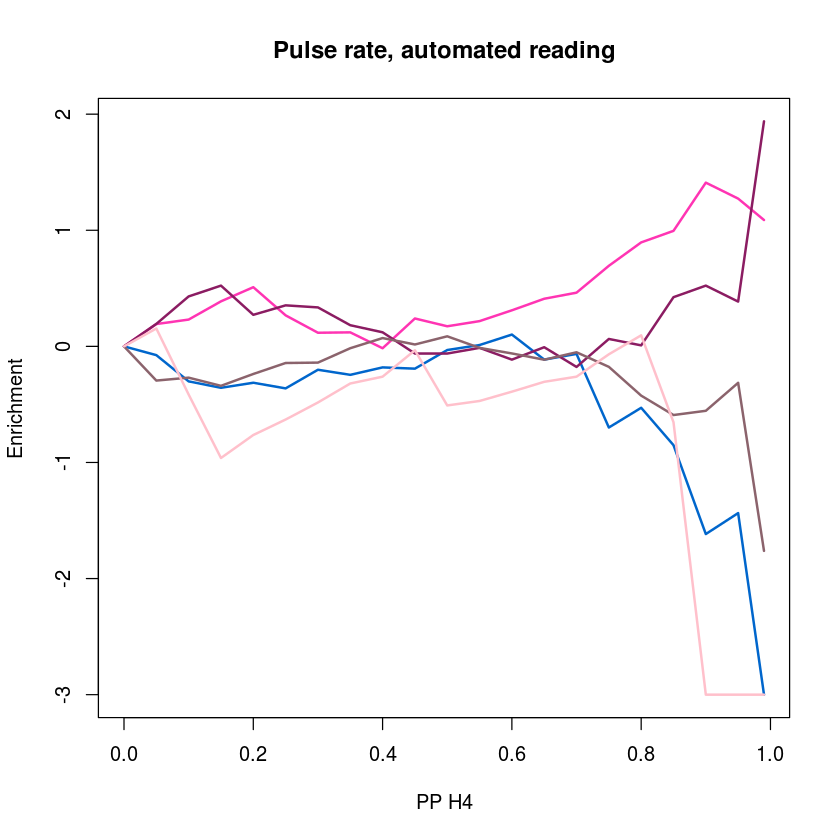

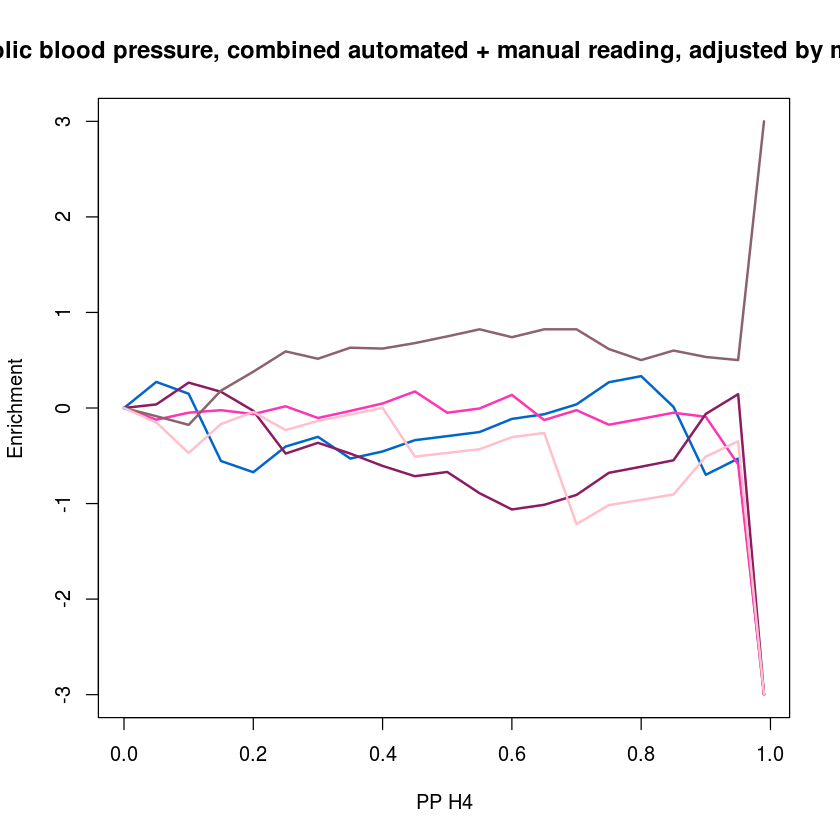

In [56]:
plot_coloc_enrichment = function(tissues, colordata, ints, coloc, trait, manifest)
{
    ints = ints [ints $trait == trait &  ints $interaction %in% tissues     ,]
    bg   = coloc[coloc$trait == trait & !coloc$tr2type     %in% ints$tr2type,]
    
    thresholds = c((0:19) / 20, 0.99)
    
    toplot = as.data.frame(rbindlist(lapply(tissues, function(tissue)
    {
        this = ints[ints$interaction == tissue, "PP.H4.abf"]
        rest = ints[ints$interaction != tissue, "PP.H4.abf"]
        
        out1 = as.data.frame(rbindlist(lapply(thresholds, function(x)
        {
            #out2 = data.frame(tissue = tissue, threshold = x, in1 = length(this[this >= x]) / length(this), bg = nrow(bg[bg$PP.H4.abf >= x,]) / nrow(bg))
            out2 = data.frame(tissue = tissue, threshold = x, in1 = length(this[this >= x]) / length(this), bg = length(rest[rest >= x]) / length(rest))
            
            return(out2)
        })), stringsAsFactors = FALSE)
        
        return(out1)
    })), stringsAsFactors = FALSE)
    
    toplot$enrichment = unlist(lapply(1:nrow(toplot), function(ii){min(c(max(c(log2(toplot[ii, "in1"] / toplot[ii, "bg"]), -3)), 3))}))
    
    plot(1,1, type = "n", xlim = range(thresholds), ylim = range(toplot$enrichment), xlab = "PP H4", ylab = "Enrichment", main = manifest[manifest$id == trait, "description"])
    
    invisible(lapply(tissues, function(tissue)
    {
        this = toplot[toplot$tissue == tissue,]
        
        lines(this$threshold, this$enrichment, col = colordata[tissue, "color"], lwd = 2)
    }))
}

trait = "continuous-102-both_sexes-irnt"
trait = "continuous-DBP-both_sexes-combined_medadj_raw"


stage2color = data.frame(tissue = c("ipsc_cvpc", "adult"), color = c("#0066CC", "#A52A56"))
rownames(stage2color) = stage2color$tissue

#plot_coloc_enrichment(c("ipsc_cvpc", "adult"), stage2color , int_gene, coloc_gene, trait, manifest)
plot_coloc_enrichment(tissue2color$tissue    , tissue2color, int_gene, coloc_gene, "continuous-102-both_sexes-irnt"               , manifest)
plot_coloc_enrichment(tissue2color$tissue    , tissue2color, int_gene, coloc_gene, "continuous-DBP-both_sexes-combined_medadj_raw", manifest)


# Collapse traits based on phenocode


In [122]:
collapse_traits = function(manifest, coloc)
{
    coloc = merge(coloc, manifest[,c("id", "phenocode")], by.x = "trait", by.y = "id")
    coloc = aggregate(PP.H4.abf ~ ., data = coloc[,c("transcript_id_eqtl", "gene_id", "gene_name", "gene_type", "type_eqtl", "tr2type", "interaction", "cell", "phenocode", "PP.H4.abf")], FUN = max)
    #coloc$trait = coloc$phenocode
    return(coloc)
}

collapsed_gene = collapse_traits(manifest, int_gene)


In [141]:
test_coloc = function(tissues, ints, trait, manifest)
{
    this        = ints[ints$cell == TRUE & ints$interaction %in% tissues & ints$trait == trait,]
    test1       = wilcox.test(this[this$interaction == tissues[[1]], "PP.H4.abf"], this[this$interaction == tissues[[2]], "PP.H4.abf"], alternative = "greater")$p.value
    test2       = wilcox.test(this[this$interaction == tissues[[1]], "PP.H4.abf"], this[this$interaction == tissues[[2]], "PP.H4.abf"], alternative = "less"   )$p.value
    out         = manifest[manifest$phenocode == trait, c("trait_type", "phenocode", "category")]
    out$tissue1 = tissues[[1]]
    out$tissue2 = tissues[[2]]
    out$pval1   = test1
    out$pval2   = test2
    
    return(out)
}

test_coloc_all = function(tissues, ints, manifest)
{
    out      = as.data.frame(rbindlist(lapply(sort(unique(ints$phenocode)), function(trait){test_coloc(tissues, ints, trait, manifest)})), stringsAsFactors = FALSE)
    out$fdr1 = p.adjust(out$pval1, method = "BH")
    out$fdr2 = p.adjust(out$pval2, method = "BH")
    
    return(out)
}

manifest2 = unique(manifest[,c("trait_type", "phenocode", "category")])

test_stage  = test_coloc_all(c("ipsc_cvpc"                       , "adult"                          ), collapsed_gene, manifest2)
test_tissue = test_coloc_all(c("heart"                           , "arteria"                        ), collapsed_gene, manifest2)
test_muscle = test_coloc_all(c("cibersort.regular.cardiac_muscle", "cibersort.regular.smooth_muscle"), collapsed_gene, manifest2)
test_endo   = test_coloc_all(c("cibersort.regular.cardiac_muscle", "cibersort.regular.endothelial"  ), collapsed_gene, manifest2)

fwrite(rbind(test_stage, test_tissue, test_muscle, test_endo), "pipeline/6.1.coloc_gwas/coloc.test_wilcoxon_collapsed.gene.txt", sep = "\t", col.names = TRUE, row.names = FALSE)


In [142]:
str(test_endo)

'data.frame':	67 obs. of  9 variables:
 $ trait_type: chr  "continuous" "continuous" "continuous" "categorical" ...
 $ phenocode : chr  "102" "12336" "12340" "20002" ...
 $ category  : chr  "UK Biobank Assessment Centre > Physical measures > Blood pressure" "UK Biobank Assessment Centre > Physical measures > ECG at rest, 12-lead" "UK Biobank Assessment Centre > Physical measures > ECG at rest, 12-lead" "UK Biobank Assessment Centre > Verbal interview > Medical conditions" ...
 $ tissue1   : chr  "cibersort.regular.cardiac_muscle" "cibersort.regular.cardiac_muscle" "cibersort.regular.cardiac_muscle" "cibersort.regular.cardiac_muscle" ...
 $ tissue2   : chr  "cibersort.regular.endothelial" "cibersort.regular.endothelial" "cibersort.regular.endothelial" "cibersort.regular.endothelial" ...
 $ pval1     : num  0.8158 0.1698 0.2178 0.0851 0.6036 ...
 $ pval2     : num  0.185 0.831 0.783 0.915 0.397 ...
 $ fdr1      : num  0.915 0.473 0.473 0.473 0.768 ...
 $ fdr2      : num  0.978 0.978 0.97

# OLD


In [ ]:
plot_coloc = function(tissues, colordata, cell2coloc, manifest)
{
    this    = as.data.frame(t(as.matrix(cell2coloc[tissues, manifest$id]) / as.numeric(cell2coloc[tissues, "eqtls"])))
    #this    = as.data.frame(t(as.matrix(cell2coloc[tissues, manifest$id])))
    rownames(colordata) = colordata$tissue
    
    this$id = rownames(this)
    this    = merge(this, manifest[,c("id", "trait_type", "phenocode", "description", "category")])
    this$n  = rowSums(this[,tissues])
    
    this    = this[order(this$trait_type, -this$n),]
    rownames(this) = this$id
    
    barplot(t(as.matrix(this[,tissues])), col = colordata[tissues, "color"], horiz = TRUE, las = 1)
    return(colordata)
    return(colordata[tissues, "color"])
    
    #return(table(this$trait_type))
    #return(this)
}

plot_coloc(c("ipsc_cvpc", "adult"), data.frame(tissue = c("ipsc_cvpc", "adult"), color = tissue2color3[c(2,3), "color"]), cell2coloc_gene, manifest)


In [ ]:
manifest

In [ ]:
test_coloc = function(int1, int2, trait, cell2coloc)
{
    totest = matrix(c(cell2coloc[cell2coloc$interaction == int1, trait],
                      cell2coloc[cell2coloc$interaction == int2, trait],
                      cell2coloc[cell2coloc$interaction == int1, "is_coloc"] - cell2coloc[cell2coloc$interaction == int1, trait],
                      cell2coloc[cell2coloc$interaction == int2, "is_coloc"] - cell2coloc[cell2coloc$interaction == int2, trait]
                     ), nrow = 2, byrow = TRUE)
    
    test = fisher.test(totest)
    out  = data.frame(int1       = int1, 
                      int2       = int2, 
                      trait      = trait, 
                      n1_trait   = totest[1,1],
                      n2_trait   = totest[1,2],
                      tot1_trait = totest[2,1],
                      tot2_trait = totest[2,2],
                      fr1        = totest[1,1] /(totest[1,1] + totest[2,1]),
                      fr2        = totest[1,2] /(totest[1,2] + totest[2,2]),
                      estimate   = test$estimate,
                      ci1        = test$conf.int[[1]],
                      ci2        = test$conf.int[[2]],
                      pval       = test$p.value
                     )
    
    return(out)
}

int1  = "ipsc_cvpc"
int2  = "adult"
trait = "biomarkers-30680-both_sexes-irnt"

test_stage   = as.data.frame(rbindlist(lapply(manifest$id, function(trait){test_coloc("ipsc_cvpc"                       , "adult"                          , trait, cell2coloc_gene)})), stringsAsFactors = FALSE)
test_tissue  = as.data.frame(rbindlist(lapply(manifest$id, function(trait){test_coloc("heart"                           , "arteria"                        , trait, cell2coloc_gene)})), stringsAsFactors = FALSE)
test_muscle  = as.data.frame(rbindlist(lapply(manifest$id, function(trait){test_coloc("cibersort.regular.cardiac_muscle", "cibersort.regular.smooth_muscle", trait, cell2coloc_gene)})), stringsAsFactors = FALSE)
test_immune  = as.data.frame(rbindlist(lapply(manifest$id, function(trait){test_coloc("cibersort.regular.cardiac_muscle", "cibersort.regular.immune"       , trait, cell2coloc_gene)})), stringsAsFactors = FALSE)

test_stage  = test_stage [test_stage $n1_trait > 0 | test_stage $n2_trait > 0,]
test_tissue = test_tissue[test_tissue$n1_trait > 0 | test_tissue$n2_trait > 0,]
test_muscle = test_muscle[test_muscle$n1_trait > 0 | test_muscle$n2_trait > 0,]
test_immune = test_immune[test_immune$n1_trait > 0 | test_immune$n2_trait > 0,]

test_stage $fdr = p.adjust(test_stage $pval, method = "BH")
test_tissue$fdr = p.adjust(test_tissue$pval, method = "BH")
test_muscle$fdr = p.adjust(test_muscle$pval, method = "BH")
test_immune$fdr = p.adjust(test_immune$pval, method = "BH")




In [ ]:
head(test_muscle[order(test_muscle$pval),])
head(test_immune[order(test_immune$pval),])
head(test_tissue[order(test_tissue$pval),])
head(test_stage [order(test_stage $pval),])
